In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error 

In [12]:
df = pd.read_csv("../data/day.csv")

df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday")

df[["dteday", "cnt"]].head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


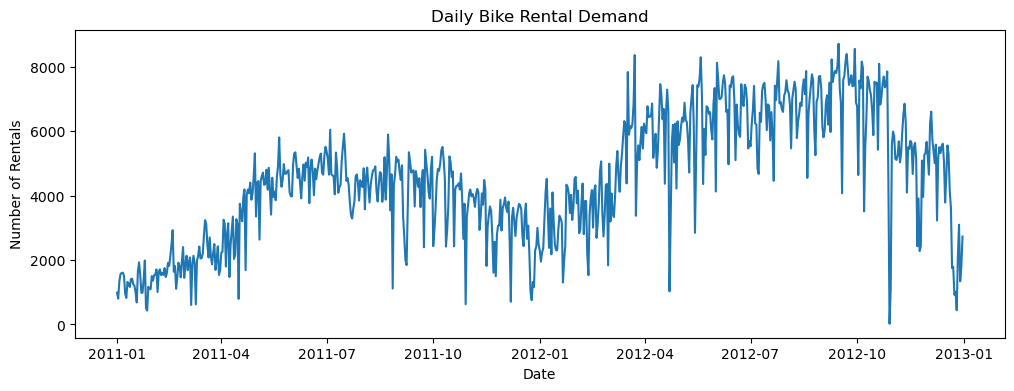

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df["dteday"], df["cnt"])
plt.title("Daily Bike Rental Demand")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.show()

In [14]:
trainSize = len(df) - 60

actuals = []
naivePreds = []
arimaPreds = []

for i in range(trainSize, len(df)):
    actuals.append(df['cnt'].iloc[i])

    naivePreds.append(df['cnt'].iloc[i-1])

    model = ARIMA(df['cnt'].iloc[:i], order=(1,1,1))
    modelFit = model.fit()
    pred = modelFit.forecast(steps=1)
    arimaPreds.append(pred.iloc[0])

In [15]:
maeNaive = mean_absolute_error(actuals, naivePreds)
maeArima = mean_absolute_error(actuals, arimaPreds)

maeNaive, maeArima

(789.5833333333334, 770.3147809782885)

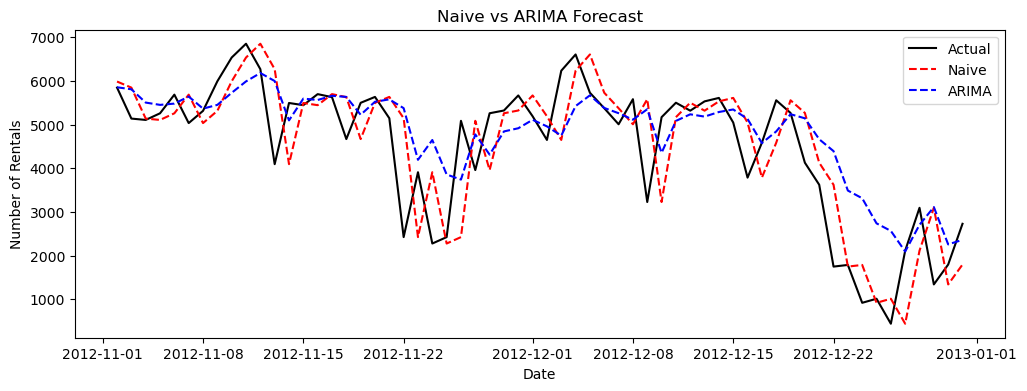

In [16]:
test_dates = df["dteday"].iloc[trainSize:]

plt.figure(figsize=(12,4))
plt.plot(test_dates, actuals, label="Actual", color='black')
plt.plot(test_dates, naivePreds, label="Naive", color='red', linestyle='--')
plt.plot(test_dates, arimaPreds, label="ARIMA", color='blue', linestyle='--')
plt.legend()
plt.title("Naive vs ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.show()


In [17]:
sarimaPreds = []

for i in range(trainSize, len(df)):

    model = SARIMAX(df['cnt'].iloc[:i], order=(1,1,1), seasonal_order=(0,1,1,7))
    modelFit = model.fit(disp=False)
    pred = modelFit.forecast(steps=1)
    sarimaPreds.append(pred.iloc[0])

maeSarima = mean_absolute_error(actuals, sarimaPreds)

maeSarima

775.1480819699738

In [18]:
cols = ["temp", "hum", "windspeed"]
df[cols]

,temp,hum,windspeed
0,0.344167,0.805833,0.160446
1,0.363478,0.696087,0.248539
2,0.196364,0.437273,0.248309
3,0.200000,0.590435,0.160296
4,0.226957,0.436957,0.186900
...,...,...,...
726,0.254167,0.652917,0.350133
727,0.253333,0.590000,0.155471
728,0.253333,0.752917,0.124383
729,0.255833,0.483333,0.350754


In [19]:
arimaxPreds = []

for i in range(trainSize, len(df)):
    
    historyCnt = df["cnt"].iloc[:i]
    historyCols = df[cols].iloc[:i]
    nextDay = df[cols].iloc[i:i+1]
    
    model = SARIMAX(
        historyCnt,
        exog=historyCols,
        order=(1,1,1),
        seasonal_order=(0,0,0,0),
    )
    
    modelFit = model.fit(disp=False)
    pred = modelFit.forecast(steps=1, exog=nextDay)
    arimaxPreds.append(pred.iloc[0])

maeArimax = mean_absolute_error(actuals, arimaxPreds)

maeArimax

677.49636303985

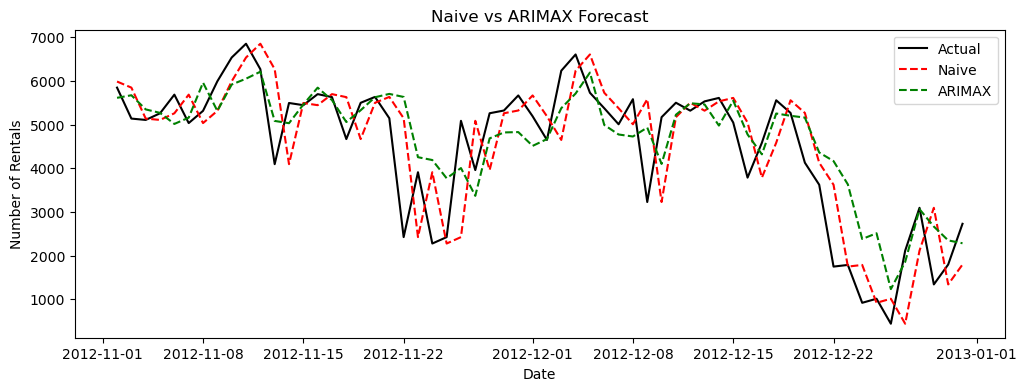

In [20]:
test_dates = df["dteday"].iloc[trainSize:]

plt.figure(figsize=(12,4))
plt.plot(test_dates, actuals, label="Actual", color='black')
plt.plot(test_dates, naivePreds, label="Naive", color='red', linestyle='--')
plt.plot(test_dates, arimaxPreds, label="ARIMAX", color='green', linestyle='--')
plt.legend()
plt.title("Naive vs ARIMAX Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.show()